# A general equation for a three-factor linear model

Before discussing the Fama-French three-factor model and other models, let's look at
a general equation for a three-factor linear model:

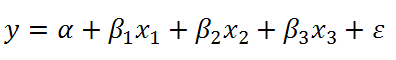



Here, $y$ is the dependent variable, $α$ is the intercept, $x_1$, $x_2$, and $x_3$ are three
independent variables, $β_1$, $β_2$ and $β_3$ are three coefficients, and ε is a random factor. In other words, we try to use three independent variables to explain one dependent
variable.

Example below shows how to estimate a multiple linear regression using **statsmodels.api.OLS()** function.
The advantage of using this function is that we could find more information about our results,
such as Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), skew, and kurtosis.  

In [ ]:

import statsmodels.api as sm
import pandas as pd
y = [0.065, 0.0265, -0.0593, -0.001,0.0346]
x1 = [0.055, -0.09, -0.041,0.045,0.022]
x2 = [0.025, 0.10, 0.021,0.145,0.012]
x3= [0.015, -0.08, 0.341,0.245,-0.022]
c= [1, 1, 1, 1, 1 ] # constants for alpha
df=pd.DataFrame({"y":y,"constant":c, "x1":x1, 'x2':x2,'x3':x3}) # create a dataframe with 5 columns
result= sm.OLS( df['y'], df[['constant', 'x1','x2','x3']]).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     8.073
Date:                Wed, 08 Nov 2023   Prob (F-statistic):              0.252
Time:                        02:30:19   Log-Likelihood:                 16.837
No. Observations:                   5   AIC:                            -25.67
Df Residuals:                       1   BIC:                            -27.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.0336      0.013      2.518      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


 The result above shows that:

*   The value of $R^2$ is 0.96 while the adjusted $R^2$ is 0.84.The $R^2$ value reflects the percentage of variations in y could be explained by $x_1$, $x_2$, and $x_3$.
Since the adjusted $R^2$ considers the impact of the number of independent variables, it is more meaningful.
*  **RMSE** stands for Mean Standard Square Error. The smaller this value, the better our model.
* The **F-value** reflects the quality of the whole model. The F-value should
be compared with its critical F-value, which in turn depends on three input variables:
confidence level, degree of freedom for the numerator, and degree of freedom for the
denominator. The scipy.stats.f.ppf() function could be applied to find out the
critical F-value; see the following code:


In [ ]:
import scipy.stats as stats
alpha=0.05 # 95% confidence level
dfNumerator=3 # the degree of freedom for the numerator (= p = the number of predictors)
dfDenominator=1 # the degree of freedom for the denumerator = n-p-1 (n = number of observations)
f=stats.f.ppf(q=1-alpha, dfn=dfNumerator, dfd=dfDenominator)
print(f)

215.70734536960882


From the preceding values, F=8.1 < 215.7 (critical F-value), we should accept the null
hypothesis that all coefficients are zero, that is, the quality of the model is not good. On the other hand, a P-value of 0.25 is way higher the critical value of 0.05. It also
means that we should accept the null hypothesis.

#Fama-French three-factor model

The Fama-French three-factor model could be viewed as a natural extension of CAPM, see here:

![image.png](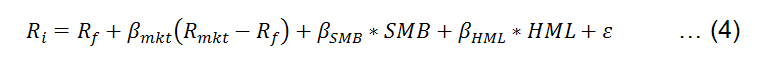
)

In [ ]:
!pip install yfinance


In [ ]:
import yfinance as yf
import numpy as np

In [ ]:
begdate= '2012-01-01'
enddate= '2016-12-31'
dataIBM = yf.download('IBM',begdate,enddate)['Adj Close']
logret = np.log(dataIBM[1:].values / dataIBM[:-1].values) #Calculate the log daily returns

[*********************100%%**********************]  1 of 1 completed


In [ ]:
logret

array([-0.00408763, -0.0047541 , -0.01154725, ..., -0.00570041,
        0.00246441, -0.00366807])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## monthly data of MKT-Rf, SMB, HML, Rf
ff=pd.read_pickle('/content/drive/MyDrive/Financial Engineering Python/data/ffMonthly.pkl')
ff.head()

,MKT_RF,SMB,HML,RF
192607,0.0296,-0.0230,-0.0287,0.0022
192608,0.0264,-0.0140,0.0419,0.0025
192609,0.0036,-0.0132,0.0001,0.0023
192610,-0.0324,0.0004,0.0051,0.0032
192611,0.0253,-0.0020,-0.0035,0.0031


In [ ]:
ff.tail()

,MKT_RF,SMB,HML,RF
201607,0.0395,0.0290,-0.0098,0.0002
201608,0.0050,0.0094,0.0318,0.0002
201609,0.0025,0.0200,-0.0134,0.0002
201610,-0.0202,-0.0440,0.0415,0.0002
201611,0.0486,0.0569,0.0844,0.0001


In [ ]:
dataIBM

Date
2012-01-03    114.206581
2012-01-04    113.740700
2012-01-05    113.201248
2012-01-06    111.901604
2012-01-09    111.319244
                 ...    
2016-12-23    116.319527
2016-12-27    116.619545
2016-12-28    115.956657
2016-12-29    116.242775
2016-12-30    115.817169
Name: Adj Close, Length: 1258, dtype: float64

In [ ]:
# Make Date variable for groupby() operation
ddate=[]
d0=dataIBM.index

In [ ]:
for i in range(0,np.size(logret)):
  print(d0[i])
  x=''.join([d0[i].strftime("%Y"),d0[i].strftime("%m")])## change all y/m/d (e.g. 1996/01/01) -> ym (e.g. 199601) so we can group the same y/m
  print(x)
  ddate.append(int(x))

print(ddate[:10])

In [ ]:
print(ddate[:10])

[201201, 201201, 201201, 201201, 201201, 201201, 201201, 201201, 201201, 201201]


In [ ]:
# Put the daily returns in DataFrame and group daily returns by months
ret_daily=pd.DataFrame(logret, index=np.array(ddate),columns=['RET'])

In [ ]:
ret_daily.head()

,RET
201201,-0.004088
201201,-0.004754
201201,-0.011547
201201,-0.005218
201201,-0.001543


In [ ]:
ret_monthly=np.exp(ret_daily.groupby(ret_daily.index).sum())   #Convert the daily returns to monthly ones

In [ ]:
ret_monthly.head()

,RET
201201,1.033924
201202,1.029484
201203,1.060447
201204,0.992982
201205,0.912846


In [ ]:
final=pd.merge(ret_monthly,ff ,left_index=True,right_index=True) # merge only when they have the same index (same year and month)

y=final['RET']
x=final[['MKT_RF','SMB','HML']]

In [ ]:
x=sm.add_constant(x) #Add a column of 1s.If the line is missing, the model will have a zero intercept.
model = sm.OLS(y,x)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     11.31
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           6.94e-06
Time:                        02:30:33   Log-Likelihood:                 105.72
No. Observations:                  59   AIC:                            -203.4
Df Residuals:                      55   BIC:                            -195.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9881      0.006    168.104      0.0

**Exercise 1**

Develop the Fama-French three-factor model for Microsoft using the historical price data from 01/01/2010 - 31/12/2016. The monthly data of MKT, SMB, and HML  is in the ffMonthly.pkl file.

*Expected result*

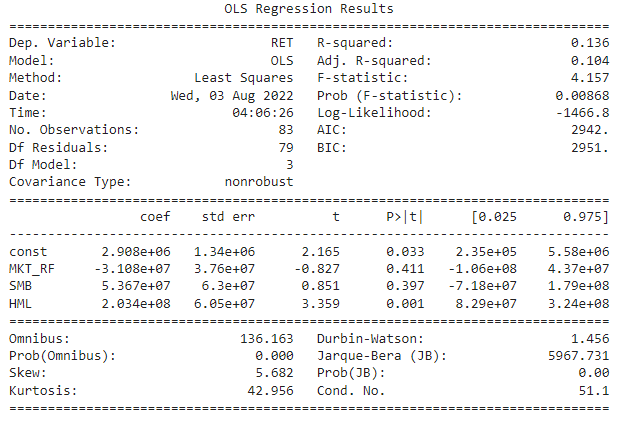

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import yfinance as yf
import numpy as np

## Read the daily price data and calculate the log return
begdate= '2010-01-01'
enddate= '2016-12-31'
dataMSFT = yf.download('MSFT;',begdate,enddate)['Adj Close']
logret = np.log(dataMSFT[1:].values / dataMSFT[:-1].values) #Calculate the log daily returns

## Read the monthly data of MKT_Rf, SMB, HML, Rf
ff=pd.read_pickle('/content/drive/MyDrive/Financial Engineering Python/data/ffMonthly.pkl')
ff.head()

## Make Date variable for groupby() operation
ddate=[]
d0=dataMSFT.index

## Calculate monthly returns and convert them to monthly ones before
for i in range(0,np.size(logret)):
  # print(d0[i])
  x=''.join([d0[i].strftime("%Y"),d0[i].strftime("%m")])## change all y/m/d (e.g. 1996/01/01) -> ym (e.g. 199601) so we can group the same y/m
  # print(x)
  ddate.append(int(x))

print(ddate[:10])

ret_daily=pd.DataFrame(logret, index=np.array(ddate),columns=['RET'])
ret_monthly=np.exp(ret_daily.groupby(ret_daily.index).sum())   #Convert the daily returns to monthly ones

## Merge the monthly returns with the monthly Fama-French three-factor time series
final=pd.merge(ret_monthly, ff, left_index=True, right_index=True) # merge only when they have the same index (same year and month)
y=final['RET']
x=final[['MKT_RF','SMB','HML']]

## Fit the Fama-French model and print the result
x=sm.add_constant(x) #Add a column of 1s.If the line is missing, the model will have a zero intercept.
model = sm.OLS(y,x)
results= model.fit()
print(results.summary())


[*********************100%%**********************]  1 of 1 completed
[201001, 201001, 201001, 201001, 201001, 201001, 201001, 201001, 201001, 201001]
                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     18.35
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           3.96e-09
Time:                        02:53:58   Log-Likelihood:                 127.23
No. Observations:                  83   AIC:                            -246.5
Df Residuals:                      79   BIC:                            -236.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      

#Performance measures

* To compare the performance of mutual functions or individual stocks, we need a performance measure.In finance, we know that investors should seek a trade-off between risk and returns.
* In this section, the Sharpe ratio, Treynor ratio, Sortino ratio, and Jensen's alpha will be discussed.

**The Sharpe ratio**

The Sharpe
ratio is a widely used performance measure and it is defined as follows:

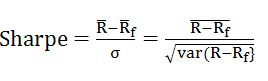


The following code is used to estimate
the Sharpe ratio with a hypothetical risk-free rate:

In [ ]:
begdate= '2012-01-01'
enddate= '2016-12-31'
dataIBM = yf.download('IBM',begdate,enddate)['Adj Close']
#retIBM = dataIBM.diff()/dataIBM.shift(1)  #Calculate the daily returns = (r_t - r_t-1)/r_t-1
retIBM = np.log(dataIBM[1:].values / dataIBM[:-1].values) #Calculate the log daily returns

rf=0.01
sharpe=np.mean(retIBM -rf)/np.std(retIBM)
print(sharpe)

[*********************100%%**********************]  1 of 1 completed
-0.8454347954304208


The Sharpe ratio looks at the total risk since the standard deviation is used as
the denominator. This measure is appropriate when the portfolio in consideration is
all the wealth for a company or individual owner.

**The Treynor ratio**

When the portfolio under consideration is only part of the wealth, using total risk is not
appropriate. Because of this, Treynor suggests using $β$ (market risk) as the denominator:

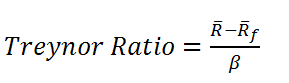


Calculate the Treynor ratio for the IBM data in the previous section

In [ ]:
rf=0.01
## Get the beta(market risk)
dataMkt =  yf.download('^GSPC',begdate,enddate)['Adj Close'] ## ** need a ticker name for the SET price index
retMkt = np.log(dataMkt[1:].values / dataMkt[:-1].values)
retIBM = np.log(dataIBM[1:].values / dataIBM[:-1].values) #Calculate the log daily returns

(beta,alpha,r_value,p_value,std_err)=stats.linregress(x=retMkt , y=retIBM )
#print(beta)

## Calculate the Treynor ratio
treynor=np.mean(retIBM -rf)/beta
print(treynor)


[*********************100%%**********************]  1 of 1 completed
-0.01134791101782448


**The Sortino ratio**

* Another argument against using standard deviation in the Sharpe ratio is that it
considers the deviations in both directions, below and above the mean. However,
we know that investors are worried more about the downside risk (deviation below
mean return).
* The second issue for the Sharpe ratio is that for the numerator, we compare mean returns with a risk-free rate. Nevertheless, for the denominator, the
deviations are from the mean return instead for the same risk-free rate.
* To overcome
those two shortcomings, a so-called Lower Partial Standard Deviation (LPSD) is
developed.
* Assume we have  $n$  returns and one risk-free rate (Rf). Assume further
that there are $m$ returns are less than this risk-free rate. LPSD is defined here:

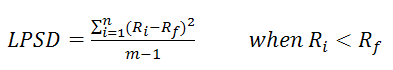

The Sortino ratio is defined here:

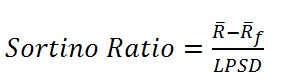

In [ ]:
## Example using 100 simulated values
mean=0.10
std=0.20
n=100
np.random.seed(12456) #To guarantee getting the same set of random numbers for return values
ret=np.random.normal(loc=mean,scale=std,size=n)  # generate return values (percentage changes from one period to the next = (r_t - r_t-1)/r_t-1 )
rf=0.02
ret_lower=ret[ret-rf<0] #Ri where Ri < Rf

m=len(ret_lower) # Get the numner of the low Ri
total=0.0
for i in np.arange(m):
  total+=(ret_lower[i]-rf)**2 #sum of the square for the LPSD nominator
LPSD=total/(m-1)
print("LPSD=",LPSD)

sortino = (np.mean(ret)-rf)/LPSD  # mean(x)-mean(constant) =  mean(x) - contstant
print("Sortino=",sortino)

LPSD= 0.04538812289945066
Sortino= 1.5222585592877684


**Exercise 2**

Calculate the Sortino ratio for the IBM data in the previous section.

*Expected result if*
* Use the  percentage changes from one period to the next as a return: -37.38412252655367
* Use the daily log return: -37.11620602721301

In [ ]:
##Enter your code here
begdate= '2012-01-01'
enddate= '2016-12-31'
dataIBM = yf.download('IBM',begdate,enddate)['Adj Close']
retIBM = np.log(dataIBM[1:].values / dataIBM[:-1].values) #Calculate the log daily returns

rf=0.02
ret_lower=retIBM[retIBM-rf<0] #Ri where Ri < Rf

m=len(ret_lower) # Get the numner of the low Ri
total=0.0
for i in np.arange(m):
  total+=(ret_lower[i]-rf)**2 #sum of the square for the LPSD nominator
LPSD=total/(m-1)
print("LPSD=",LPSD)

sortino = (np.mean(retIBM)-rf)/LPSD  # mean(x)-mean(constant) =  mean(x) - contstant
print("Sortino=",sortino)

[*********************100%%**********************]  1 of 1 completed
LPSD= 0.0005551676518298865
Sortino= -36.00508658795287
